## Section 3.2

In [1]:
using LightGraphs, Distributions

In [2]:
ipr(eigenvector) = sum(eigenvector.^4)/(sum(eigenvector.^2))^2.

ipr (generic function with 1 method)

In [3]:
c = 5
n_vertices = 1000
ensemble = 2

2

In [4]:
L = random_regular_graph(n_vertices,c)
adj = adjacency_matrix(L)
M = adj./c - eye(n_vertices)
a,eig_vectors = eigs(M, which = :LM, nev= n_vertices)
I2 = [ipr(eig_vectors[:,i]) for i in 1:n_vertices-1]

for k in 1:ensemble-1
    L = random_regular_graph(n_vertices,c)
    adj = adjacency_matrix(L)
    M = adj./c - eye(n_vertices)
    a,eig_vectors = eigs(M, which = :LM, nev= n_vertices)
    I2 = hcat(I2, [ipr(eig_vectors[:,i]) for i in 1:n_vertices-1])
end

    


In [5]:
t2 = [mean(-log.(I2[i,:])./log(n_vertices)) for i in 1:n_vertices-1];
IPR = [mean(I2[i,:]) for i in 1:n_vertices-1];

In [6]:
using Plots

In [7]:
pyplot()

Plots.PyPlotBackend()

In [8]:
using LaTeXStrings

In [9]:
#Plots.scalefontsizes(0.5)

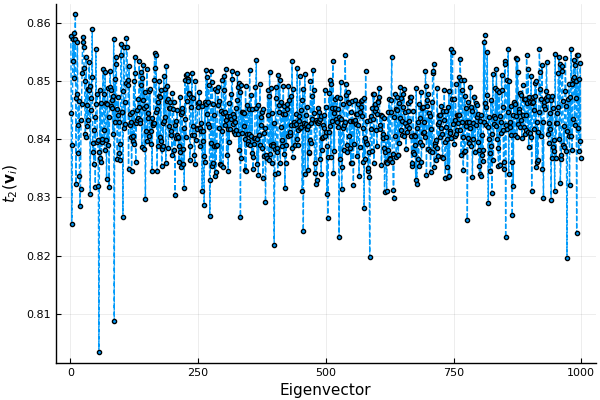

In [10]:
plot(t2, xlabel = "Eigenvector", ylabel = L"t_2(\mathbf{v}_i)", label = "", marker = 3, style = :dash )

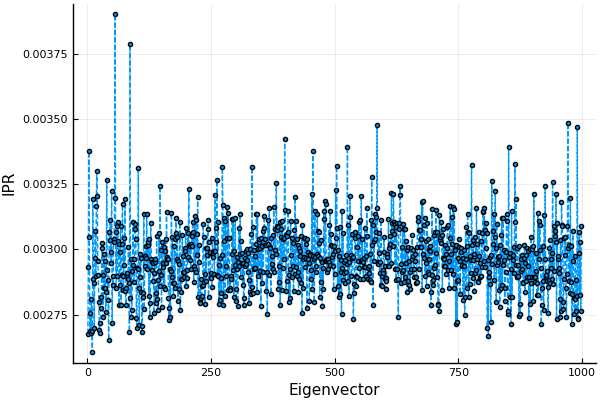

In [11]:
plot(IPR, xlabel = "Eigenvector", ylabel = "IPR", label = "", marker = 3, style = :dash )

In [12]:
c = [3,5,7]

3-element Array{Int64,1}:
 3
 5
 7

In [13]:
L = random_regular_graph(n_vertices,c[1])
adj = adjacency_matrix(L)
M = adj./c[1] - eye(n_vertices)
eig_vals,eig_vectors = eigs(M, which = :LM, nev= n_vertices-1)
lambdas = eig_vals

for i in 2:length(c)
    L = random_regular_graph(n_vertices,c[i])
    adj = adjacency_matrix(L)
    M = adj./c[i] - eye(n_vertices)
    eig_vals,eig_vectors = eigs(M, which = :LM, nev= n_vertices-1)
    lambdas = hcat(lambdas, eig_vals)
end


In [14]:
rho_theor(lambda, con) = con/(2*pi)*sqrt(4*(con-1)/con^2 - (lambda + 1)^2)/(1-(lambda + 1)^2)

rho_theor (generic function with 1 method)

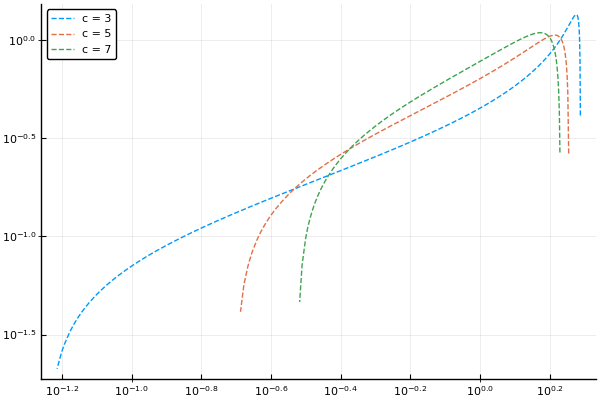

In [15]:
i = 1
a = lambdas[:,i]
plot(-a, -a.*rho_theor.(a,c[i]), style = :dash,  xscale = :log10, yscale = :log10, label = "c = $(c[i])")
for i in 2:length(c)
    a = lambdas[:,i]
    plot!(-a, -a.*rho_theor.(a,c[i]), style = :dash,  xscale = :log10, yscale = :log10, label = "c = $(c[i])")
end
plot!()

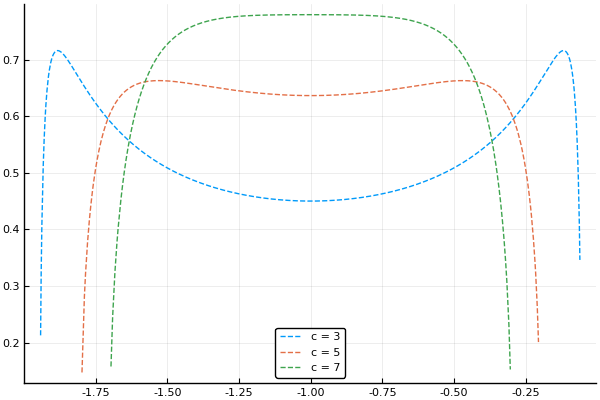

In [28]:
i = 1
a = lambdas[:,i]
plot(a, rho_theor.(a,c[i]), style = :dash,   label = "c = $(c[i])")
for i in 2:length(c)
    a = lambdas[:,i]
    plot!(a, rho_theor.(a,c[i]), style = :dash,   label = "c = $(c[i])")
end
plot!()

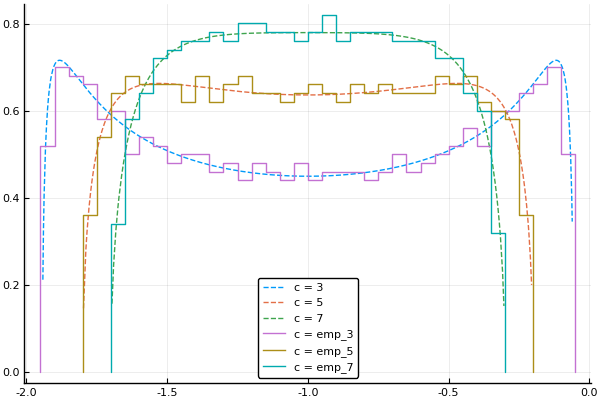

In [29]:
i = 1
a = lambdas[:,i]
stephist!(a, label = "c = emp_$(c[i])", bins = 50, normed = true)
for i in 2:length(c)
    a = lambdas[:,i]
    stephist!(a, label = "c = emp_$(c[i])", bins = 50, normed = true)
end
plot!()